In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/110.0.5481.178"})
    soup=bts(result.text,"html.parser")
    return soup

In [4]:
pages=["https://housinganywhere.com/s/Barcelona--Spain"]
for page in range(2,146):
    pages.append("https://housinganywhere.com/s/Barcelona--Spain?page=" +str (page))
    
pages

['https://housinganywhere.com/s/Barcelona--Spain',
 'https://housinganywhere.com/s/Barcelona--Spain?page=2',
 'https://housinganywhere.com/s/Barcelona--Spain?page=3',
 'https://housinganywhere.com/s/Barcelona--Spain?page=4',
 'https://housinganywhere.com/s/Barcelona--Spain?page=5',
 'https://housinganywhere.com/s/Barcelona--Spain?page=6',
 'https://housinganywhere.com/s/Barcelona--Spain?page=7',
 'https://housinganywhere.com/s/Barcelona--Spain?page=8',
 'https://housinganywhere.com/s/Barcelona--Spain?page=9',
 'https://housinganywhere.com/s/Barcelona--Spain?page=10',
 'https://housinganywhere.com/s/Barcelona--Spain?page=11',
 'https://housinganywhere.com/s/Barcelona--Spain?page=12',
 'https://housinganywhere.com/s/Barcelona--Spain?page=13',
 'https://housinganywhere.com/s/Barcelona--Spain?page=14',
 'https://housinganywhere.com/s/Barcelona--Spain?page=15',
 'https://housinganywhere.com/s/Barcelona--Spain?page=16',
 'https://housinganywhere.com/s/Barcelona--Spain?page=17',
 'https://hou

In [5]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"css-16pwyb1-cardLink-link"}):
        links.append("https://housinganywhere.com" + resulthf.get("href"))

links

['https://housinganywhere.com/room/1331177/es/Barcelona/carrer-de-sant-bartomeu',
 'https://housinganywhere.com/room/1753499/es/Barcelona/carrer-del-rec',
 'https://housinganywhere.com/room/1692140/es/Barcelona/carrer-ample',
 'https://housinganywhere.com/room/1647684/es/Barcelona/carrer-ample',
 'https://housinganywhere.com/room/1700322/es/Barcelona/carrer-ample',
 "https://housinganywhere.com/room/1918888/es/L'Hospitalet de Llobregat/carrer-del-cinca",
 "https://housinganywhere.com/room/1748113/es/L'Hospitalet de Llobregat/carrer-de-l-empord",
 'https://housinganywhere.com/room/1917462/es/Barcelona/carrer-de-mallorca',
 'https://housinganywhere.com/room/1818601/es/Barcelona/carrer-de-sant-baltasar',
 'https://housinganywhere.com/room/1702978/es/Barcelona/carrer-de-cal-bria',
 'https://housinganywhere.com/room/1917395/es/Barcelona/carrer-gran-de-gr-cia',
 'https://housinganywhere.com/room/1918399/es/Barcelona/carrer-de-la-pescateria',
 "https://housinganywhere.com/room/1721117/es/L'Ho

In [6]:
len(links)

3480

In [45]:
ex=getAndParseURL("https://housinganywhere.com/room/1596306/es/Barcelona/carrer-nou-de-la-rambla")

In [49]:
### For Rent Price ###
ex.find("div",{"class":"MuiGrid-root MuiGrid-container MuiGrid-item MuiGrid-grid-xs-6 css-174xb6y-costName"
}).text[0:5].replace("€","").strip()

'1500'

In [50]:
### For Location Info  ###
ex.find("h2",{"class":"MuiTypography-root MuiTypography-h2 css-1njgbqb-h2-overflow-initial-color-default-address"}).text

'Carrer Nou de la Rambla'

In [77]:
### For Net_Area ###
ex.findAll("p",{"class":"MuiTypography-root MuiTypography-body1 css-1agh6db-paragraph-overflow-initial-color-default"
})[1].text.replace("Property: ","").replace("m²","").strip()

'45'

In [82]:
### For Bedroom Num ###
ex.findAll("p",{"class":"MuiTypography-root MuiTypography-body1 css-1agh6db-paragraph-overflow-initial-color-default"
})[4].text.replace("bedrooms","").strip()

'2'

In [85]:
### For Capacity of Flat ###
ex.findAll("p",{"class":"MuiTypography-root MuiTypography-body1 css-1agh6db-paragraph-overflow-initial-color-default"
})[3].text.strip()

'Space for 2 people'

In [54]:
### For Deposit ###
ex.find("div",{"class":"MuiGrid-root MuiGrid-item MuiGrid-grid-xs-12 MuiGrid-grid-md-10 MuiGrid-grid-lg-8 css-1ncwui0"}).find(text=re.compile("Deposits")).findNext().text.replace("€","").strip()

'1400'

In [86]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("h2",{"class":"MuiTypography-root MuiTypography-h2 css-1njgbqb-h2-overflow-initial-color-default-address"}).text.strip()
    except:
        location = np.nan
    try:
        rent= html.find("div",{"class":"MuiGrid-root MuiGrid-container MuiGrid-item MuiGrid-grid-xs-6 css-174xb6y-costName"}).text[0:5].replace("€","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.find("div",{"class":"MuiGrid-root MuiGrid-item MuiGrid-grid-xs-12 MuiGrid-grid-md-10 MuiGrid-grid-lg-8 css-1ncwui0"}).find(text=re.compile("Deposits")).findNext().text.replace("€","").strip()
    except:
        deposit = np.nan
    try:
        rooms = html.findAll("p",{"class":"MuiTypography-root MuiTypography-body1 css-1agh6db-paragraph-overflow-initial-color-default"})[4].text.replace("bedrooms","").strip()
    except:
        rooms = np.nan
    try:
        capacity = html.findAll("p",{"class":"MuiTypography-root MuiTypography-body1 css-1agh6db-paragraph-overflow-initial-color-default"})[3].text.strip()
    except:
        capacity = np.nan
    try:
        net_area = html.findAll("p",{"class":"MuiTypography-root MuiTypography-body1 css-1agh6db-paragraph-overflow-initial-color-default"})[1].text.replace("Property: ","").replace("m²","").strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,rooms,capacity,net_area])
    
columns=["Location","Rent","Deposit","Rooms","Capacity","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [87]:
df

,Location,Rent,Deposit,Rooms,Capacity,Net Area
0,Carrer de Sant Bartomeu,750,500,Studio,Space for 2 people,22
1,Carrer del Rec,950,1900,Studio,Space for 1 person,25
2,Carrer Ample,900,300,Studio,Space for 2 people,20
3,Carrer Ample,900,300,Studio,Space for 2 people,20
4,Carrer Ample,900,300,Studio,Space for 2 people,20
...,...,...,...,...,...,...
3475,Carrer de Pelai,3182,3182,30 housemates (mixed),Space for 1 person,Bedroom: 21
3476,Carrer de Pelai,3182,3182,30 housemates (mixed),Space for 1 person,Bedroom: 21
3477,Passeig de la Bonanova,6285,400,4,Space for 8 people,180
3478,Carrer de Ballester,4849,7399,4,Space for 8 people,85


In [88]:
df.to_csv("barcelona_rental.csv")

In [19]:
df=pd.read_csv("barcelona_rental.csv")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  3368 non-null   object
 1   Rent      3368 non-null   object
 2   Deposit   3368 non-null   object
 3   Rooms     3140 non-null   object
 4   Capacity  3368 non-null   object
 5   Net Area  3368 non-null   object
dtypes: object(6)
memory usage: 163.2+ KB


In [3]:
df["Rent"]=df["Rent"].astype(float)

In [4]:
df["Rent"].mean()

1433.418349168646

In [5]:
df["Deposit"]=df["Deposit"].astype(float)

In [6]:
df["Deposit"].mean()

1429.5970902612826

In [7]:
df["Rooms"].unique()

array(['Studio', '1 bedroom', 'Space for 1 person', 'Space for 2 people',
       '6 housemates (female)', '2', '10 housemates (female)', nan,
       'Space for 4 people', '2 housemates (female)',
       'Space for 6 people', '4', '3', 'Space for 3 people',
       '2 housemates (mixed)', '3 housemates (female)',
       '10 housemates (mixed)', 'Space for 9 people',
       '4 housemates (mixed)', '3 housemates (mixed)',
       '8 housemates (mixed)', '5 housemates (mixed)',
       '7 housemates (mixed)', '9 housemates (female)', '5',
       '100 housemates (mixed)', 'Space for 5 people',
       '18 housemates (mixed)', '7 housemates (female)',
       '250 housemates (mixed)', '6 housemates (mixed)',
       '9 housemates (mixed)', '1 housemate (mixed)',
       '300 housemates (mixed)', '8 housemates (female)',
       'Space for 10 people', '1 housemate (male)',
       '30 housemates (mixed)'], dtype=object)

In [20]:
def replace_bedroom_value(value):
    if pd.isna(value):
        return 1
    elif 'housemates' in value:
        return "shared"
    elif '1 bedroom' in value:
        return 1
    elif 'Studio' in value:
        return "1+0"
    elif "Space" in value:
        return "shared"
    elif "housemate" in value:
        return "shared"
    else:
        return value
   
df['Rooms'] = df['Rooms'].apply(replace_bedroom_value)

In [21]:
df["Rooms"].unique()

array(['1+0', 1, 'shared', '2', '4', '3', '5'], dtype=object)

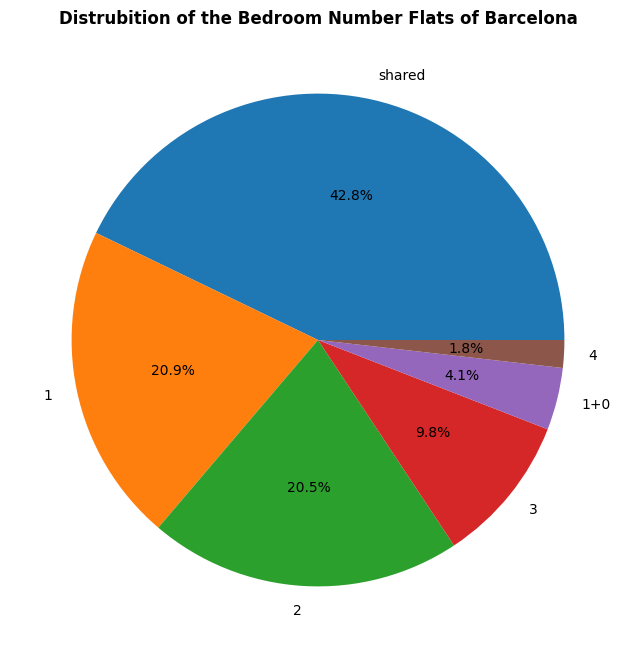

In [23]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Barcelona',weight="bold")

# display the chart
plt.show();


In [25]:
df["Rooms"].value_counts()

shared    1488
1          727
2          713
3          340
1+0        142
4           63
5            7
Name: Rooms, dtype: int64

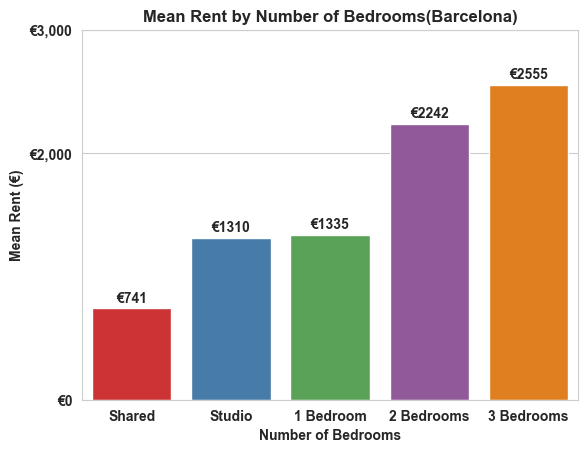

In [28]:
### Calculate mean rent for each group + add expenses ###
studio_mean_rent=df[df['Rooms'] == "1+0"]['Rent'].mean()
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Rooms'] == "2"]['Rent'].mean()
three_bed_mean_rent = df[df['Rooms'] == "3"]['Rent'].mean()
shared_mean_rent = df[df['Rooms'] == "shared"]['Rent'].mean()

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=["Studio",'1 Bedroom', '2 Bedrooms','3 Bedrooms',"Shared"], y=[shared_mean_rent,studio_mean_rent,one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(["Shared","Studio",'1 Bedroom', '2 Bedrooms','3 Bedrooms',], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Barcelona)', weight='bold')

plt.show();